In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG1**

In [ ]:
import pandas as pd
 
temp_alg1 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg1.csv")
temp_alg1 = temp_alg1.drop(['Unnamed: 0'], axis=1)
print(temp_alg1)

     id  alg  time    3    4    5    6    7    8    9  ...  79593  79594  \
0     1    1     1  938  936  937  937  938  937  937  ...    936    937   
1     1    1     2  936  936  938  936  937  938  937  ...    937    937   
2     1    1     3  937  938  936  936  938  937  937  ...    937    936   
3     1    1     4  937  936  938  936  937  938  937  ...    936    936   
4     1    1     5  937  937  937  937  937  937  937  ...    937    936   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    1   996  940  940  939  940  938  940  940  ...    940    940   
996  10    1   997  940  940  939  940  939  940  939  ...    939    941   
997  10    1   998  938  938  939  940  939  940  939  ...    939    940   
998  10    1   999  939  939  940  940  939  940  939  ...    940    938   
999  10    1  1000  939  939  938  939  941  939  939  ...    939    938   

     79595  79596  79597  79598  79599  79600  79601  79602  
0      937    935    937 

In [ ]:
Y = temp_alg1.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = temp_alg1.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,938,936,937,937,938,937,937,936,937,936,...,936,937,937,935,937,936,937,937,936,937
1,936,936,938,936,937,938,937,938,936,937,...,937,937,937,938,936,938,937,936,936,938
2,937,938,936,936,938,937,937,938,936,936,...,937,936,937,937,937,937,936,936,937,937
3,937,936,938,936,937,938,937,936,938,937,...,936,936,937,937,937,937,939,937,936,938
4,937,937,937,937,937,937,937,935,936,936,...,937,936,937,936,937,936,937,937,936,937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,940,940,939,940,938,940,940,939,940,940,...,940,940,941,940,939,938,938,938,940,939
996,940,940,939,940,939,940,939,939,939,939,...,939,941,939,940,939,939,940,939,939,939
997,938,938,939,940,939,940,939,940,939,940,...,939,940,940,938,939,940,940,939,939,939
998,939,939,940,940,939,940,939,939,939,939,...,940,938,939,939,940,939,940,939,940,940


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

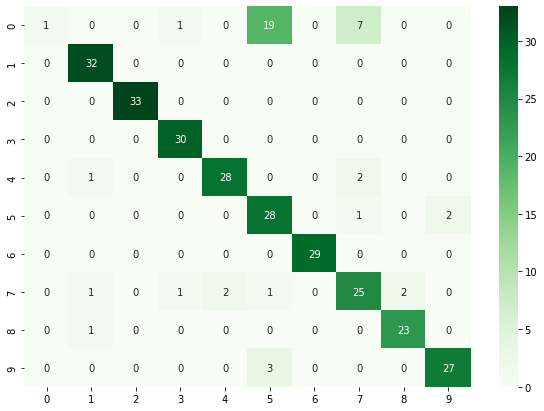

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.04      0.07        28
           2       0.91      1.00      0.96        32
           3       1.00      1.00      1.00        33
           4       0.94      1.00      0.97        30
           5       0.93      0.90      0.92        31
           6       0.55      0.90      0.68        31
           7       1.00      1.00      1.00        29
           8       0.71      0.78      0.75        32
           9       0.92      0.96      0.94        24
          10       0.93      0.90      0.92        30

    accuracy                           0.85       300
   macro avg       0.89      0.85      0.82       300
weighted avg       0.89      0.85      0.82       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


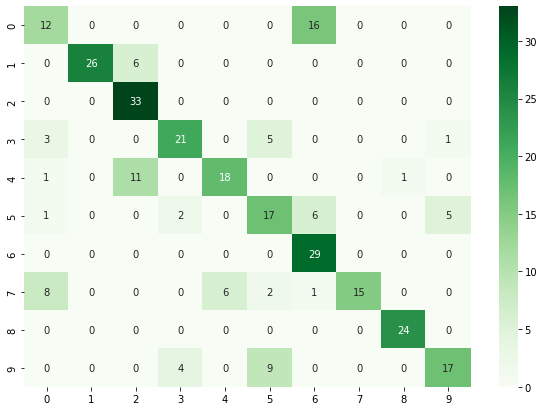

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.43      0.45        28
           2       1.00      0.81      0.90        32
           3       0.66      1.00      0.80        33
           4       0.78      0.70      0.74        30
           5       0.75      0.58      0.65        31
           6       0.52      0.55      0.53        31
           7       0.56      1.00      0.72        29
           8       1.00      0.47      0.64        32
           9       0.96      1.00      0.98        24
          10       0.74      0.57      0.64        30

    accuracy                           0.71       300
   macro avg       0.74      0.71      0.70       300
weighted avg       0.74      0.71      0.70       300



# **VOLT ALG1**

In [ ]:
import pandas as pd
 
volt_alg1 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg1.csv")
volt_alg1 = volt_alg1.drop(['Unnamed: 0'], axis=1)
print(volt_alg1)

     id  alg  time     3     4     5     6     7     8     9  ...  79593  \
0     1    1     1  1489  1489  1489  1489  1489  1490  1489  ...   1490   
1     1    1     2  1488  1489  1489  1490  1489  1489  1489  ...   1490   
2     1    1     3  1490  1489  1489  1489  1489  1489  1490  ...   1489   
3     1    1     4  1489  1490  1491  1489  1489  1489  1490  ...   1490   
4     1    1     5  1489  1490  1491  1489  1489  1490  1489  ...   1490   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    1   996  1503  1503  1503  1503  1502  1502  1502  ...   1503   
996  10    1   997  1503  1502  1502  1503  1503  1503  1502  ...   1502   
997  10    1   998  1503  1502  1502  1503  1502  1503  1503  ...   1503   
998  10    1   999  1502  1502  1502  1502  1502  1503  1502  ...   1501   
999  10    1  1000  1502  1502  1504  1503  1502  1503  1503  ...   1503   

     79594  79595  79596  79597  79598  79599  79600  79601  79602  
0     1490   1490 

In [ ]:
Y = volt_alg1.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = volt_alg1.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,1489,1489,1489,1489,1489,1490,1489,1489,1489,1489,...,1490,1490,1490,1490,1488,1489,1489,1489,1490,1489
1,1488,1489,1489,1490,1489,1489,1489,1489,1490,1489,...,1490,1489,1489,1490,1490,1489,1490,1489,1489,1489
2,1490,1489,1489,1489,1489,1489,1490,1489,1488,1489,...,1489,1489,1489,1490,1489,1489,1489,1489,1489,1489
3,1489,1490,1491,1489,1489,1489,1490,1490,1489,1490,...,1490,1489,1489,1489,1489,1489,1489,1489,1490,1490
4,1489,1490,1491,1489,1489,1490,1489,1489,1490,1489,...,1490,1490,1489,1489,1489,1489,1488,1489,1490,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1503,1503,1503,1503,1502,1502,1502,1503,1503,1503,...,1503,1502,1503,1503,1503,1503,1503,1503,1503,1503
996,1503,1502,1502,1503,1503,1503,1502,1503,1503,1503,...,1502,1503,1502,1503,1502,1503,1503,1503,1502,1502
997,1503,1502,1502,1503,1502,1503,1503,1502,1503,1503,...,1503,1503,1503,1503,1502,1503,1504,1503,1502,1503
998,1502,1502,1502,1502,1502,1503,1502,1503,1502,1502,...,1501,1502,1503,1502,1502,1503,1504,1501,1503,1504


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

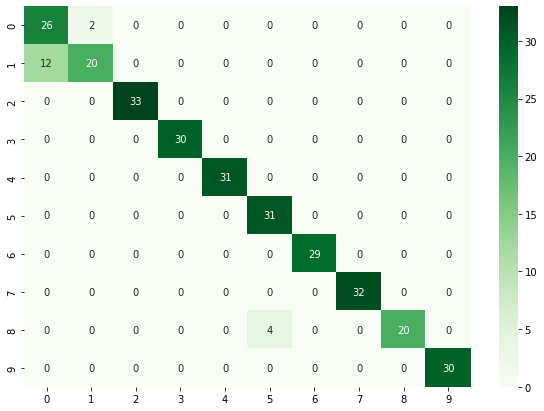

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.93      0.79        28
           2       0.91      0.62      0.74        32
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       0.89      1.00      0.94        31
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        32
           9       1.00      0.83      0.91        24
          10       1.00      1.00      1.00        30

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


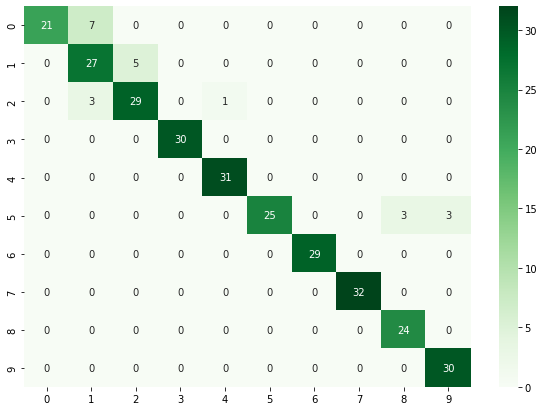

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        28
           2       0.73      0.84      0.78        32
           3       0.85      0.88      0.87        33
           4       1.00      1.00      1.00        30
           5       0.97      1.00      0.98        31
           6       1.00      0.81      0.89        31
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        32
           9       0.89      1.00      0.94        24
          10       0.91      1.00      0.95        30

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# **ALGORITMO 1**

In [ ]:
import pandas as pd

temp_alg1 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg1.csv")
temp_alg1 = temp_alg1.drop(['Unnamed: 0'], axis=1)
print(temp_alg1)

volt_alg1 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg1.csv")
volt_alg1 = volt_alg1.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg1)

     id  alg  time    3    4    5    6    7    8    9  ...  79593  79594  \
0     1    1     1  938  936  937  937  938  937  937  ...    936    937   
1     1    1     2  936  936  938  936  937  938  937  ...    937    937   
2     1    1     3  937  938  936  936  938  937  937  ...    937    936   
3     1    1     4  937  936  938  936  937  938  937  ...    936    936   
4     1    1     5  937  937  937  937  937  937  937  ...    937    936   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    1   996  940  940  939  940  938  940  940  ...    940    940   
996  10    1   997  940  940  939  940  939  940  939  ...    939    941   
997  10    1   998  938  938  939  940  939  940  939  ...    939    940   
998  10    1   999  939  939  940  940  939  940  939  ...    940    938   
999  10    1  1000  939  939  938  939  941  939  939  ...    939    938   

     79595  79596  79597  79598  79599  79600  79601  79602  
0      937    935    937 

In [ ]:
alg1 = pd.merge(temp_alg1, volt_alg1, on='time', suffixes=('_1', '_2'))
alg1

,id,alg,time,3_1,4_1,5_1,6_1,7_1,8_1,9_1,...,79593_2,79594_2,79595_2,79596_2,79597_2,79598_2,79599_2,79600_2,79601_2,79602_2
0,1,1,1,938,936,937,937,938,937,937,...,1490,1490,1490,1490,1488,1489,1489,1489,1490,1489
1,1,1,2,936,936,938,936,937,938,937,...,1490,1489,1489,1490,1490,1489,1490,1489,1489,1489
2,1,1,3,937,938,936,936,938,937,937,...,1489,1489,1489,1490,1489,1489,1489,1489,1489,1489
3,1,1,4,937,936,938,936,937,938,937,...,1490,1489,1489,1489,1489,1489,1489,1489,1490,1490
4,1,1,5,937,937,937,937,937,937,937,...,1490,1490,1489,1489,1489,1489,1488,1489,1490,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,1,996,940,940,939,940,938,940,940,...,1503,1502,1503,1503,1503,1503,1503,1503,1503,1503
996,10,1,997,940,940,939,940,939,940,939,...,1502,1503,1502,1503,1502,1503,1503,1503,1502,1502
997,10,1,998,938,938,939,940,939,940,939,...,1503,1503,1503,1503,1502,1503,1504,1503,1502,1503
998,10,1,999,939,939,940,940,939,940,939,...,1501,1502,1503,1502,1502,1503,1504,1501,1503,1504


In [ ]:
Y = alg1.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = alg1.iloc[:, 3:]
X

,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,11_1,12_1,...,79593_2,79594_2,79595_2,79596_2,79597_2,79598_2,79599_2,79600_2,79601_2,79602_2
0,938,936,937,937,938,937,937,936,937,936,...,1490,1490,1490,1490,1488,1489,1489,1489,1490,1489
1,936,936,938,936,937,938,937,938,936,937,...,1490,1489,1489,1490,1490,1489,1490,1489,1489,1489
2,937,938,936,936,938,937,937,938,936,936,...,1489,1489,1489,1490,1489,1489,1489,1489,1489,1489
3,937,936,938,936,937,938,937,936,938,937,...,1490,1489,1489,1489,1489,1489,1489,1489,1490,1490
4,937,937,937,937,937,937,937,935,936,936,...,1490,1490,1489,1489,1489,1489,1488,1489,1490,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,940,940,939,940,938,940,940,939,940,940,...,1503,1502,1503,1503,1503,1503,1503,1503,1503,1503
996,940,940,939,940,939,940,939,939,939,939,...,1502,1503,1502,1503,1502,1503,1503,1503,1502,1502
997,938,938,939,940,939,940,939,940,939,940,...,1503,1503,1503,1503,1502,1503,1504,1503,1502,1503
998,939,939,940,940,939,940,939,939,939,939,...,1501,1502,1503,1502,1502,1503,1504,1501,1503,1504


### **kNN**


In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

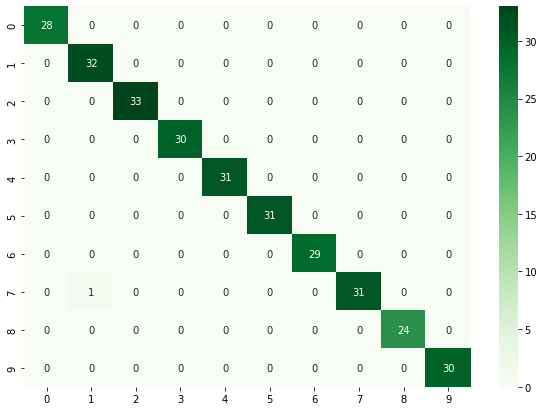

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.97      0.98        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


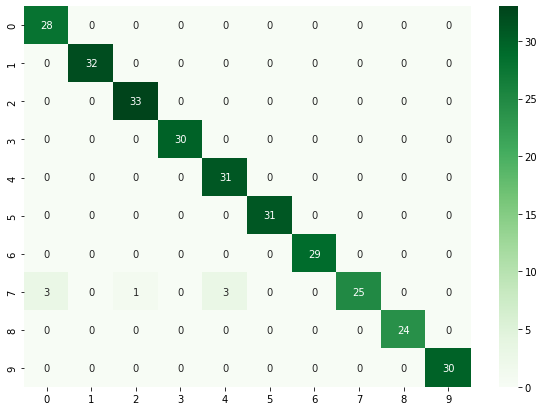

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        32
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        30
           5       0.91      1.00      0.95        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.78      0.88        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

